In [1]:
# Load accelData from pickle

import pickle
import numpy as np
import matplotlib.pyplot as plt

# open accelData pickle
import pickle
with open('drive/MyDrive/Pickles/accelData.pickle', 'rb') as handle:
    accelData = pickle.load(handle)

In [3]:
# Remove time column from accelData Measurements
accelData['Measurements with Time'] = accelData['Measurements']

for i in range(len(accelData['Measurements'])):
    accelData['Measurements'][i] = accelData['Measurements'][i].iloc[:, 1:]

In [4]:
# Work with accelData['Measurements'], which is a list of dataframes

# Create Windows and window labels dataset
windows = []
windowLabels = []

# Create windows
windowSize = 100

for i in range(len(accelData['Measurements'])):
    label = accelData['Abnormal'][i]
    data = accelData['Measurements'][i]
    for j in range(0, len(data) - windowSize, windowSize):
        windows.append(data[j:j+windowSize])
        windowLabels.append(label)
    
# Sanity check
print(len(windows))

179961


In [5]:
print(windows[0])

     AccXRA   AccYRA   AccZRA   AccXLA   AccYLA   AccZLA   AccXRW   AccYRW  \
0   0.07910  0.02148 -0.98242  0.07031  0.49902 -0.85840 -0.89062  0.16699   
1   0.08691  0.02344 -0.98828  0.07031  0.50391 -0.86035 -0.90430  0.16309   
2   0.08691  0.02344 -0.97949  0.07129  0.50488 -0.86133 -0.91797  0.16309   
3   0.08398  0.02637 -0.99023  0.07129  0.50488 -0.86133 -0.91797  0.20703   
4   0.07324  0.02637 -0.96387  0.06738  0.50488 -0.86133 -0.89355  0.24512   
..      ...      ...      ...      ...      ...      ...      ...      ...   
95  0.01465  0.92871  0.50391  0.06836  0.50000 -0.86035 -0.55371  0.11328   
96  0.00977  0.88867  0.50391  0.07031  0.50293 -0.86133 -0.51562  0.10352   
97 -0.08008  0.88672  0.28516  0.07227  0.50293 -0.85742 -0.50098  0.10352   
98 -0.08008  0.87500  0.10644  0.07227  0.50293 -0.86230 -0.50098  0.12402   
99 -0.06152  0.84863 -0.18164  0.07031  0.50195 -0.86230 -0.51367  0.17773   

     AccZRW   AccXLW   AccYLW   AccZLW  AccSumRA  AccSumLA  Acc

In [6]:
# Normalise each window
for i in range(len(windows)):
    windows[i] = (windows[i] - windows[i].mean()) / windows[i].std()


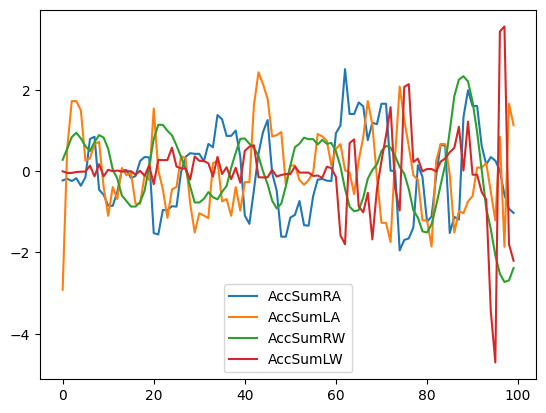

In [7]:
# Plot the AccSumRA, AccSumLA, AccSumRW, AccSumLW columns of the first window
plt.plot(windows[0]['AccSumRA'])
plt.plot(windows[0]['AccSumLA'])
plt.plot(windows[0]['AccSumRW'])
plt.plot(windows[0]['AccSumLW'])
plt.legend(['AccSumRA', 'AccSumLA', 'AccSumRW', 'AccSumLW'])
plt.show()

In [8]:
# Train a deep learning classifier to classify the windows
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.optimizers import Adam

# Convert windowLabels to one-hot encoding
encoder = LabelEncoder()
encoder.fit(windowLabels)
encodedLabels = encoder.transform(windowLabels)
encodedLabels = to_categorical(encodedLabels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(windows, encodedLabels, test_size=0.2, random_state=42)

# Create the model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(windowSize, 16)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)), epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(np.array(X_test), np.array(y_test))
print('Accuracy: %.2f' % (accuracy*100))




Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4493/4499 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.6302WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000019100D5B4C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

In [14]:
# Define a function that does the following:

# Takes a set of trials and trial labels : accelData['Measurements'], accelData['Abnormal']
# Splits sets into training and testing datasets

# For training set:
# Create windows of size windowSize and stride stride
# The windows should be stored in a list: trainWindows
# Each window label should be the label of the trial it came from
# The window labels should be stored in a list: trainWindowLabels
# Normalise each window
# Create a deep learning model and train on the windows and window labels

# For testing set:
# For each trial:
# Create windows of size windowSize and stride stride
# The windows should be stored in a list: testWindows
# Each window label should be the label of the trial it came from
# The window labels should be stored in a list: testWindowLabels
# Normalise each window
# Predict the label of each window using the trained model
# For each trial, calculate the proportion of windows that were classified as abnormal
# Based on the proportion, classify the trial as 0 (normal), 0.5 (borderline), or 1 (abnormal)
# Compare the classification to the true label and calculate the accuracy
# Return the accuracy

# The function should return the accuracy of the model on the testing set
# The function should also return the proportion of windows classified as abnormal for each trial in the testing set

def createWindows(data, windowSize, stride):
    windows = []
    for i in range(0, len(data) - windowSize, stride):
        windows.append(data[i:i+windowSize])
    return windows

def normaliseWindows(windows):
    for i in range(len(windows)):
        windows[i] = (windows[i] - windows[i].mean()) / windows[i].std()
    return windows

def windowClassification(trials, labels, windowSize, stride):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(trials, labels, test_size=0.2, random_state=42)

    # Status update
    print('Data split into training and testing sets')

    

    # Split X_train into windows
    trainWindows = []
    trainWindowLabels = []
    for i in range(len(X_train)):
        windows = createWindows(X_train[i], windowSize, stride)
        for window in windows:
            trainWindows.append(window)
            trainWindowLabels.append(y_train[i])

    # Convert trainWindowLabels to one-hot encoding
    encoder = LabelEncoder()
    encoder.fit(trainWindowLabels)
    encodedLabels = encoder.transform(trainWindowLabels)
    encodedLabels = to_categorical(encodedLabels)   
    print(encodedLabels)

    # Status update
    print('Training windows created')

    # Normalise trainWindows
    trainWindows = normaliseWindows(trainWindows)

    # Status update
    print('Training windows normalised')

    



    # Create the model
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(windowSize, 16)))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(np.array(trainWindows), np.array(encodedLabels), epochs=2, verbose=1)

    # Split X_test into windows, ensuring that the windows are segmented by trial
    # Use nested list, where each element is a list of windows from a single trial
    testWindows = []
    testWindowLabels = []
    for i in range(len(X_test)):
        windows = createWindows(X_test[i], windowSize, stride)
        testWindows.append(windows)
        testWindowLabels.append(y_test[i])
    
    # Normalise testWindows
    for i in range(len(testWindows)):
        testWindows[i] = normaliseWindows(testWindows[i])

    # Predict the label of each window using the trained model
    predictions = []
    
    for trial in testWindows:
        trialPredictions = model.predict(np.array(trial))
        predictions.append(trialPredictions)

    print(predictions)

    # For each trial, calculate the proportion of windows that were classified as abnormal
    proportions = []
    for i in range(len(predictions)):
        abnormalCount = 0
        for window in predictions[i]:
            if np.argmax(window) == 1:
                abnormalCount += 1
        proportions.append(abnormalCount / len(predictions[i]))

    
    # Based on the proportion, classify the trial as 0 (normal), 0.5 (borderline), or 1 (abnormal)
    classifications = []
    for proportion in proportions:
        if proportion < 0.1:
            classifications.append(0)
        elif proportion > 0.9:
            classifications.append(1)
        else:
            classifications.append(0.5)
    
    # Compare the classification to the true label and calculate the accuracy
    correct = 0
    for i in range(len(classifications)):
        if classifications[i] == y_test[i]:
            correct += 1
    accuracy = correct / len(y_test)

    return accuracy, proportions

# Test the function
accuracy, proportions = windowClassification(accelData['Measurements'], accelData['Abnormal'], 100, 50)

    

Data split into training and testing sets
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Training windows created
Training windows normalised
Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8946/8946 [==============================] - 94s 10ms/step - loss: nan - accuracy: 0.6126
Epoch 2/2
8946/8946 [==============================] - 91s 10ms/step - loss: nan - accuracy: 0.6145
Pleas

In [11]:
print(accuracy)
print(proportions)

0.6666666666666666
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
